In [61]:
# machine learning process
#1. Data load & check
#2. EDA
#3. Feature Engineering
#4. Modeling & make submission

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_csv('data/test.csv', parse_dates=['pickup_datetime'])
train = pd.read_csv('data/train.csv', parse_dates=['pickup_datetime', 'dropoff_datetime'])
display(train.head(), test.head())


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [64]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


In [65]:
pd.options.display.float_format = '{:.5f}'.format
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


<AxesSubplot: >

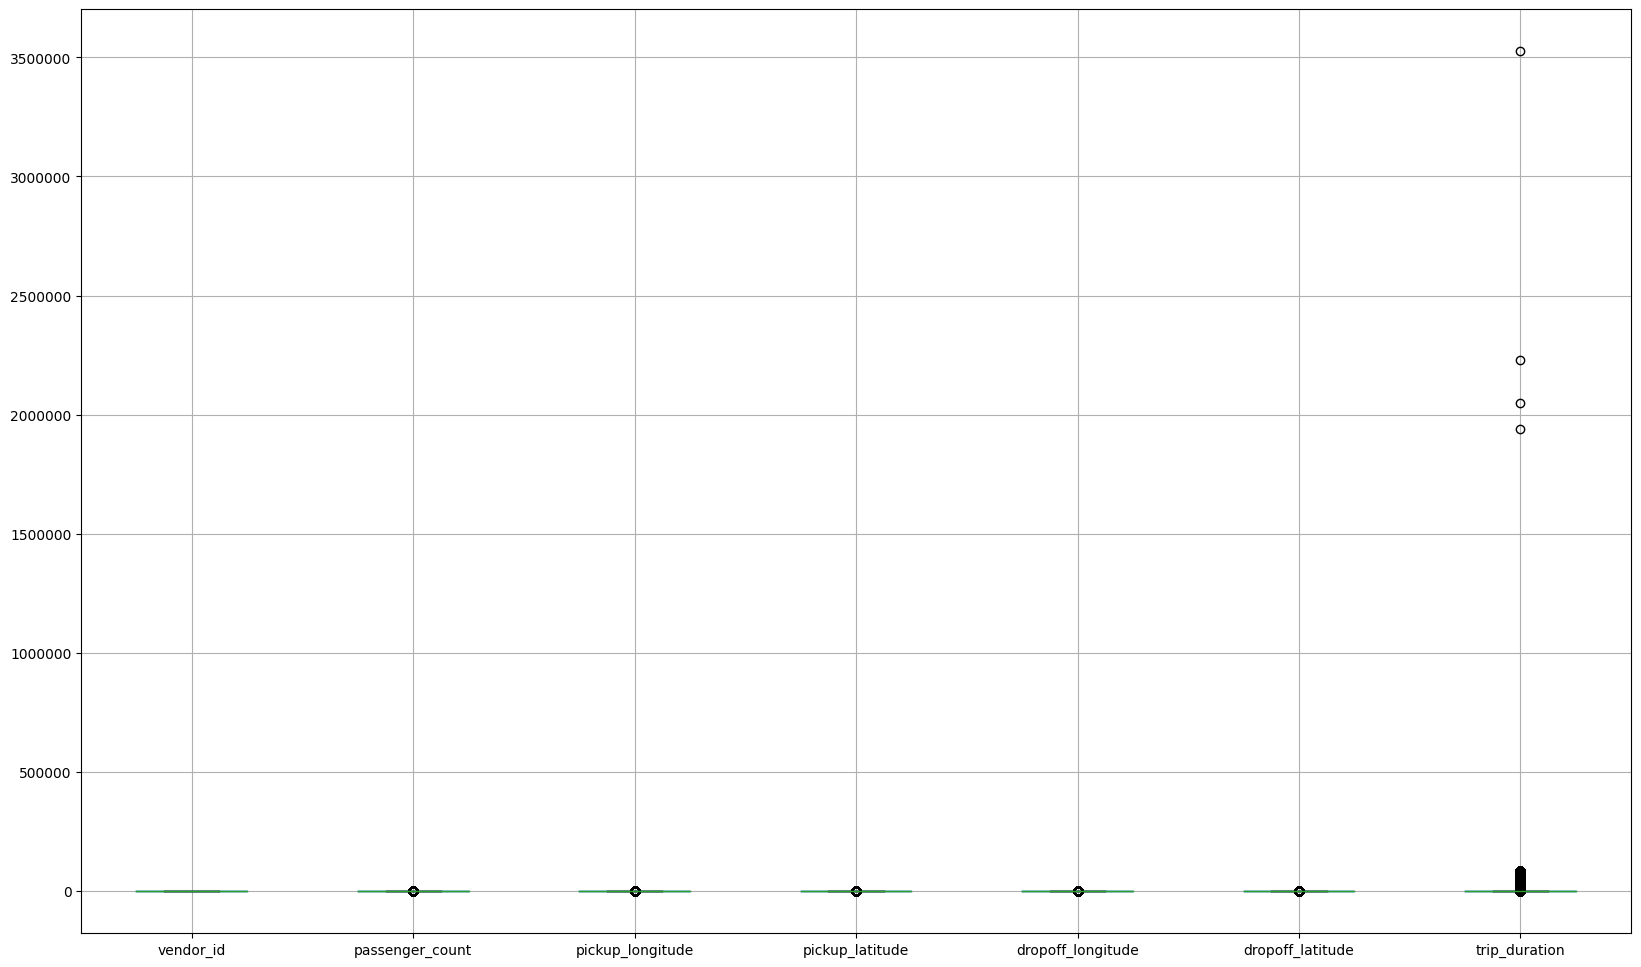

In [66]:
plt.figure(figsize=(20,12))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot()

<AxesSubplot: >

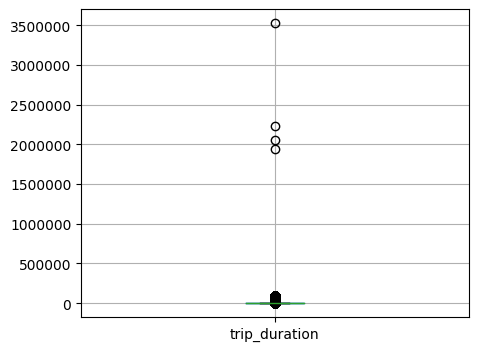

In [67]:
plt.figure(figsize=(5,4))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot(column="trip_duration", return_type = 'axes')

In [68]:
train = train[(train.trip_duration < 1500000)]

<AxesSubplot: >

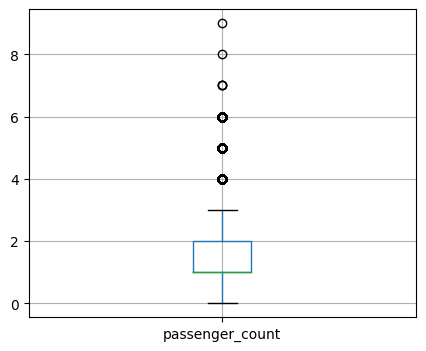

In [69]:
plt.figure(figsize=(5,4))
plt.ticklabel_format(axis = 'y', useOffset=False, style='plain')
train.boxplot(column="passenger_count", return_type = 'axes')

In [70]:
train = train[(train.passenger_count > 0)]

In [71]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000
mean,1.53495,1.66460,-73.97349,40.75092,-73.97342,40.75180,952.78376
std,0.49878,1.31423,0.07090,0.03288,0.07064,0.03589,3170.60179
min,1.00000,1.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73589,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96302,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,86392.00000


In [72]:
train = train[(train.pickup_longitude > -90)]
train = train[(train.pickup_latitude < 50)]
train = train[(train.dropoff_longitude > -120)]

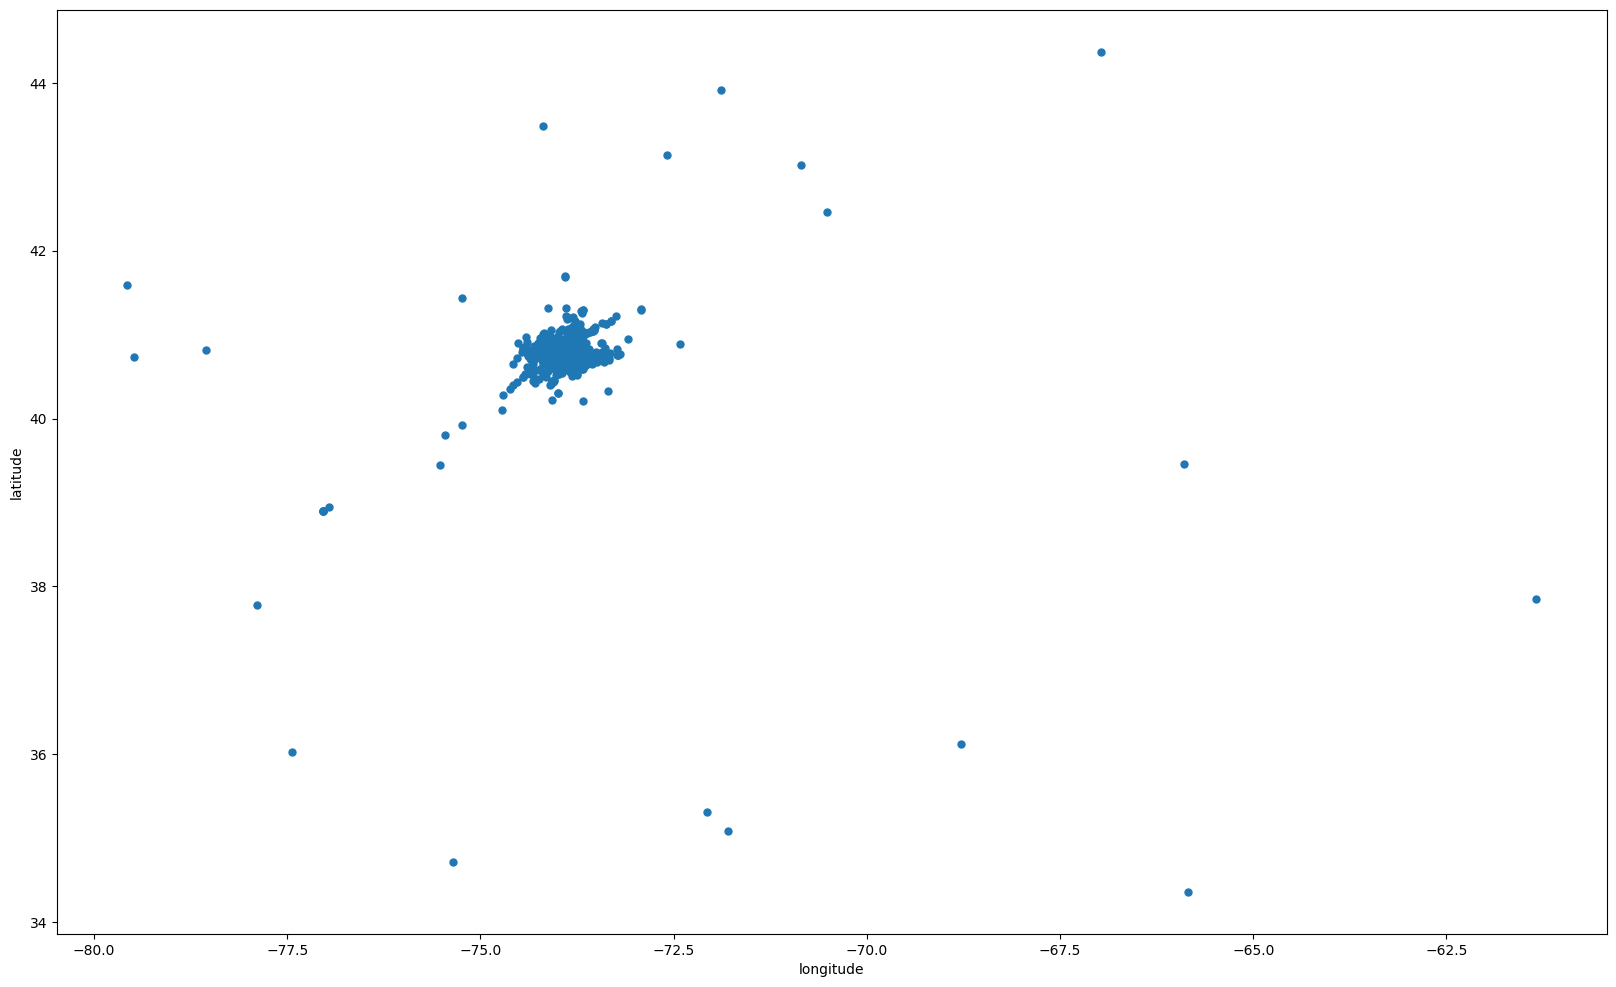

In [73]:
pickup_ln = list(train.pickup_longitude) #탑승한 위치
pickup_la = list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

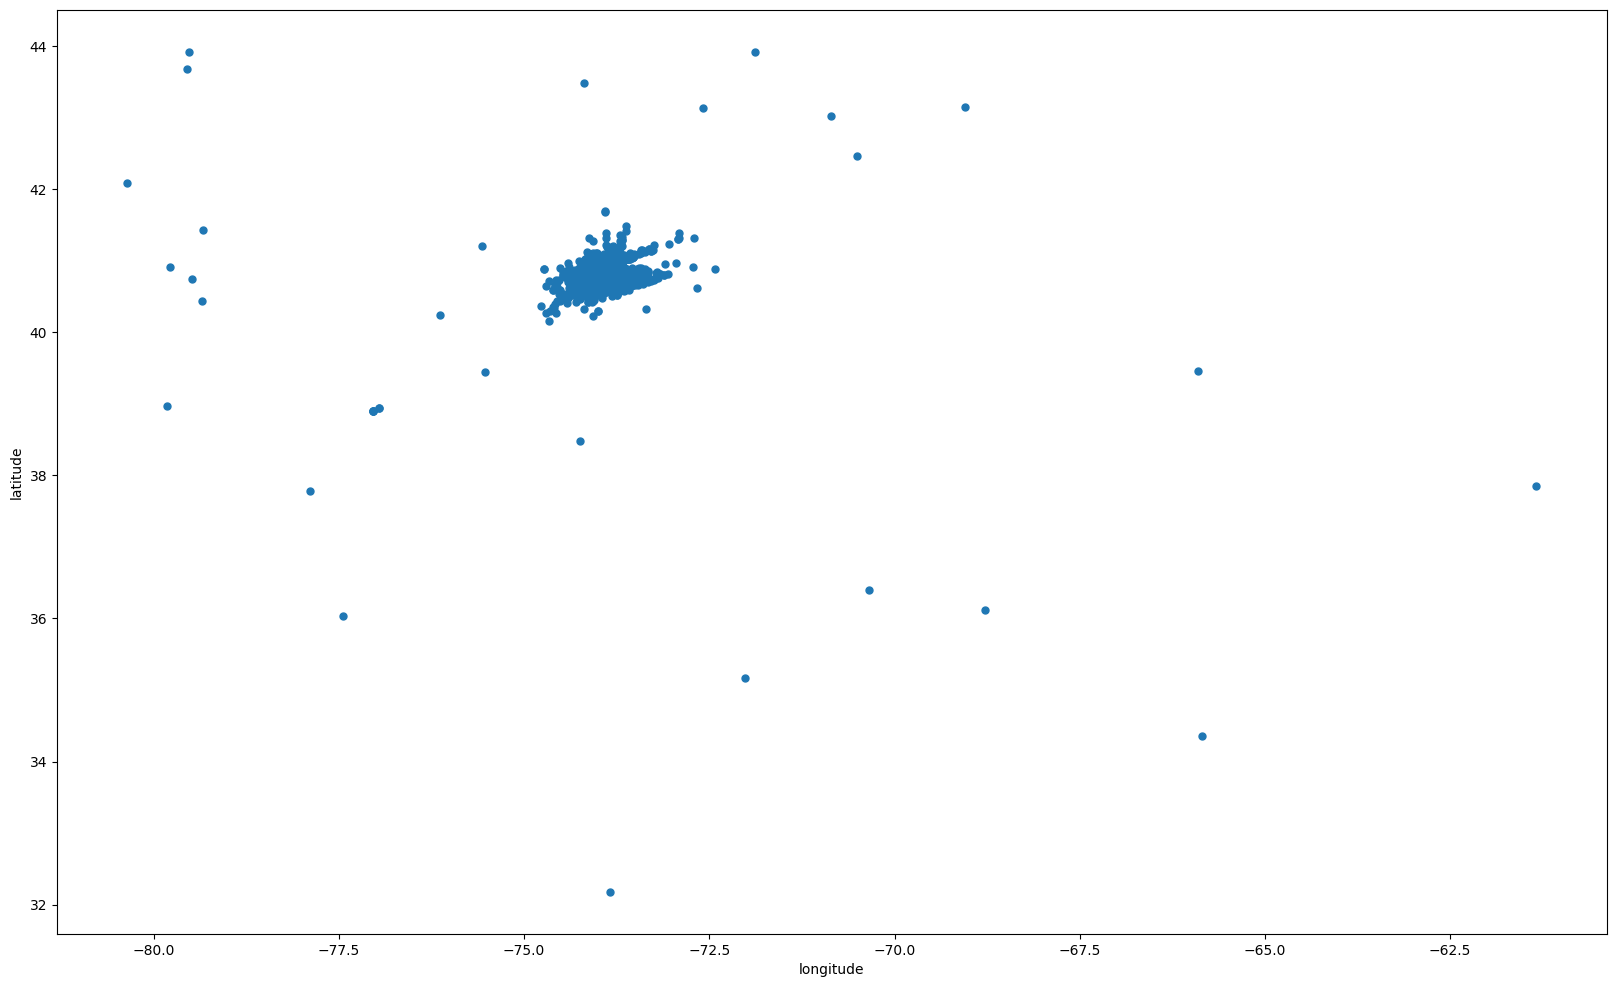

In [74]:
dropoff_ln = list(train.dropoff_longitude) # 내린 위치
dropoff_la = list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

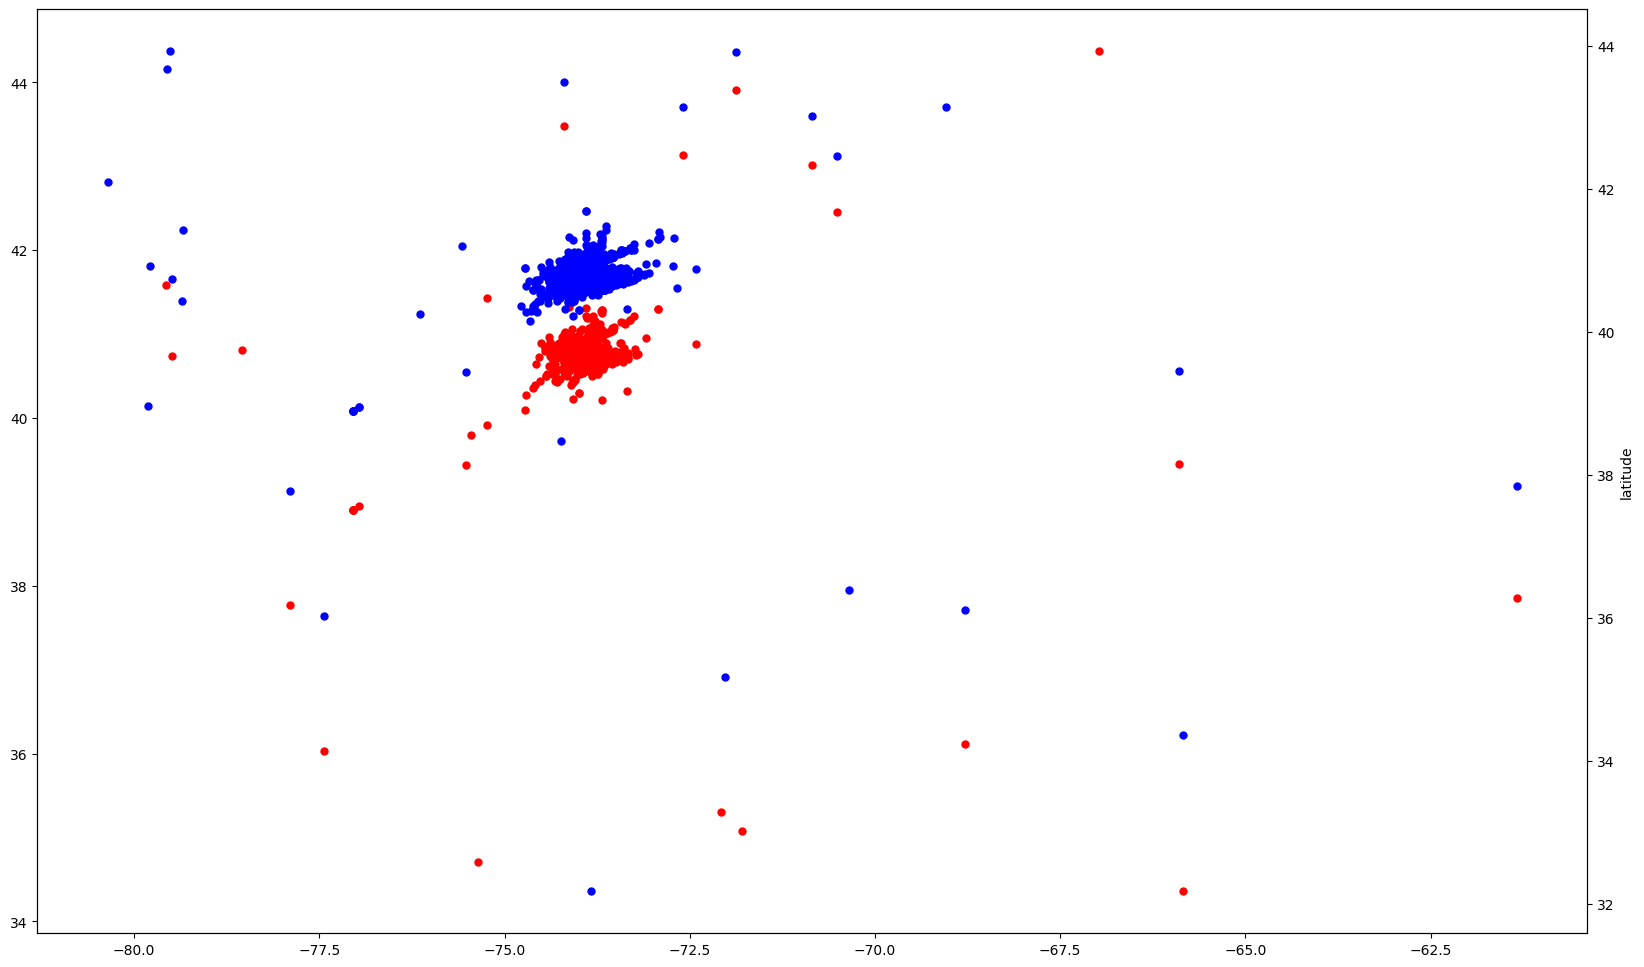

In [75]:
plt.figure(figsize=(20,12))

ax1 = plt.subplot()
ax1.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10, color = 'red') #탑승한 위치

ax2 = plt.twinx()
ax2.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10, color = 'blue') #내린 위치

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

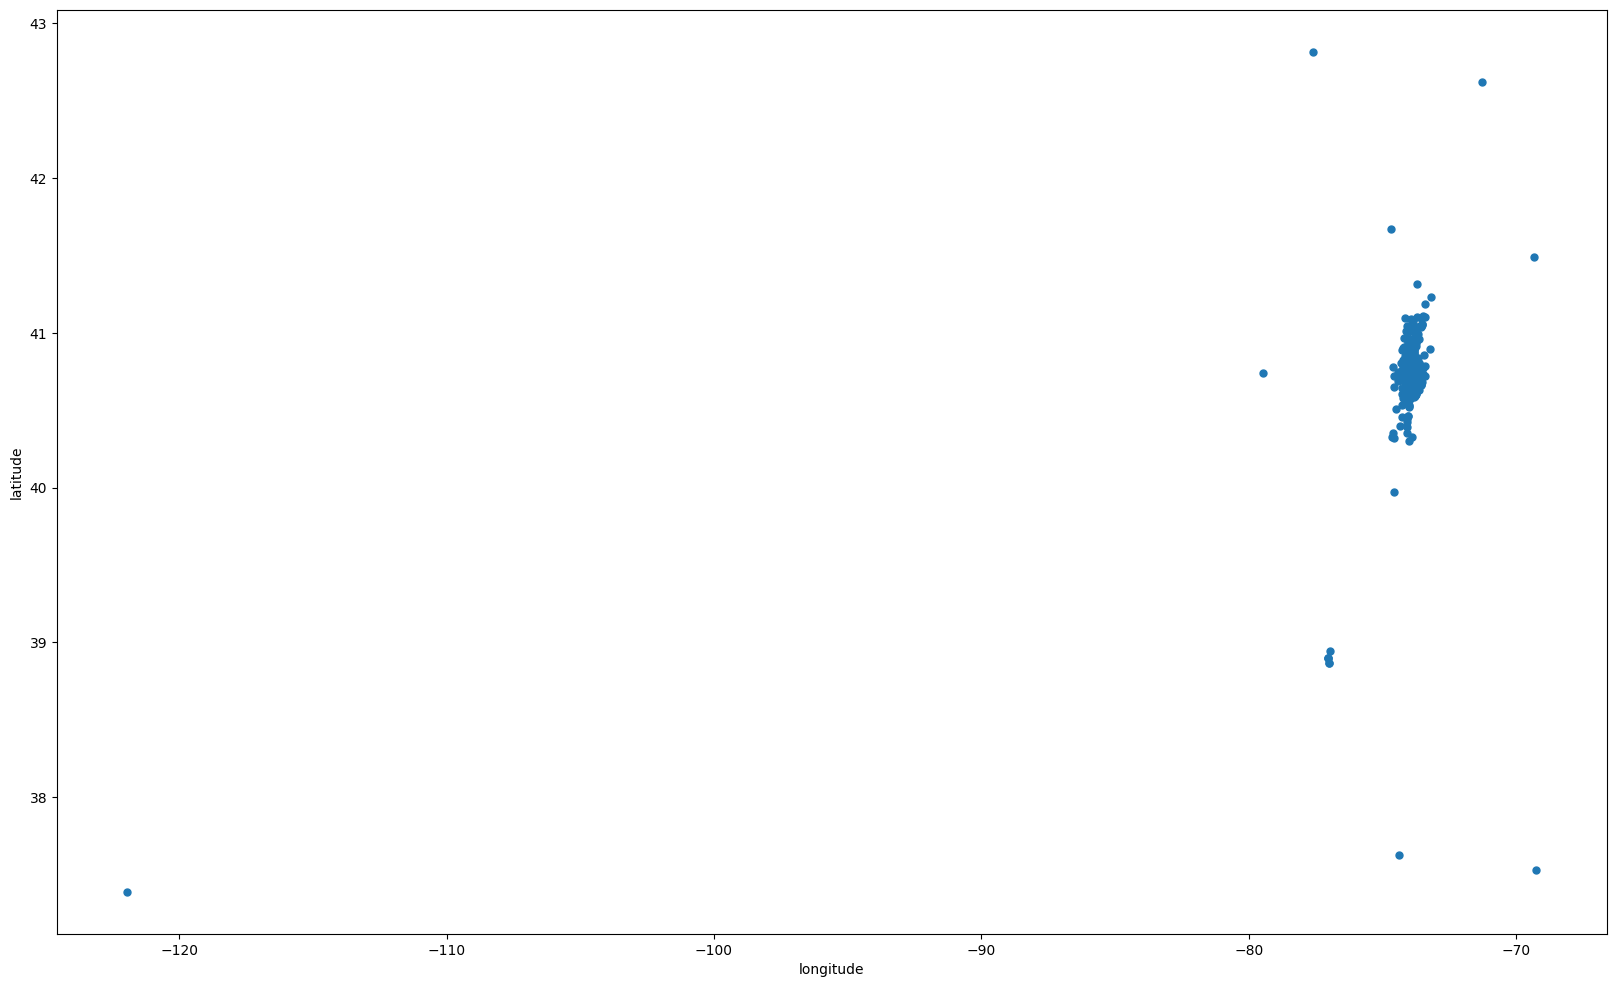

In [76]:
pickup_ln = list(test.pickup_longitude) #탑승한 위치
pickup_la = list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

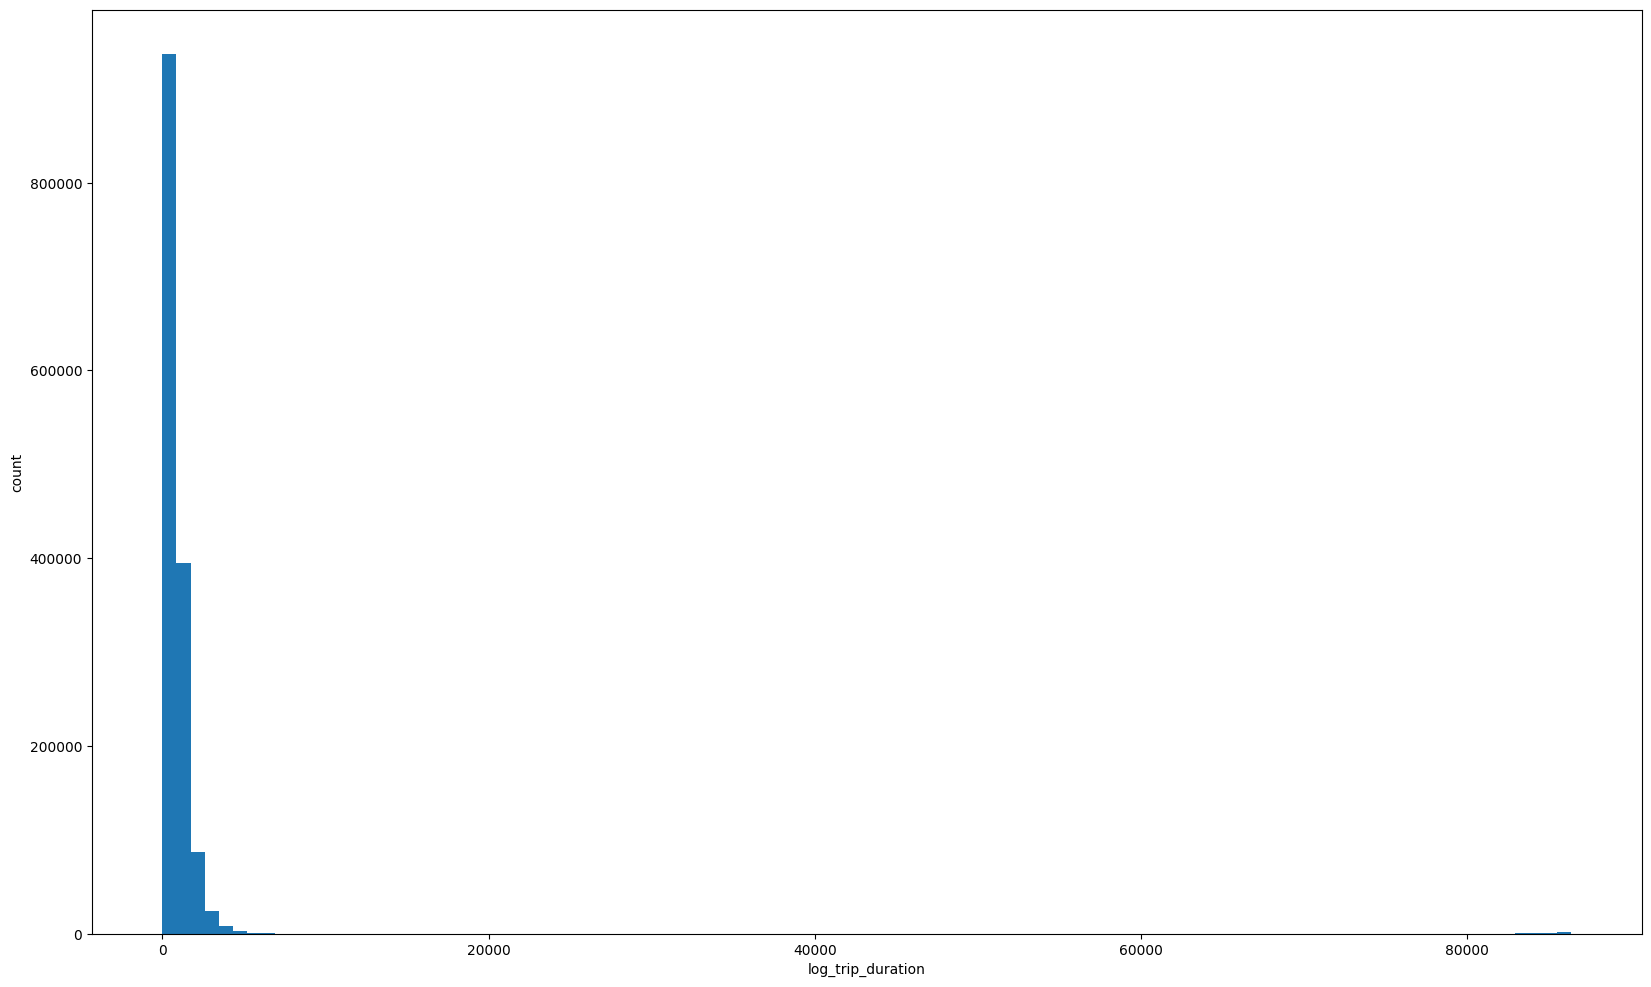

In [77]:
plt.figure(figsize=(20,12))
train['trip_duration'] = train['trip_duration'].values
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

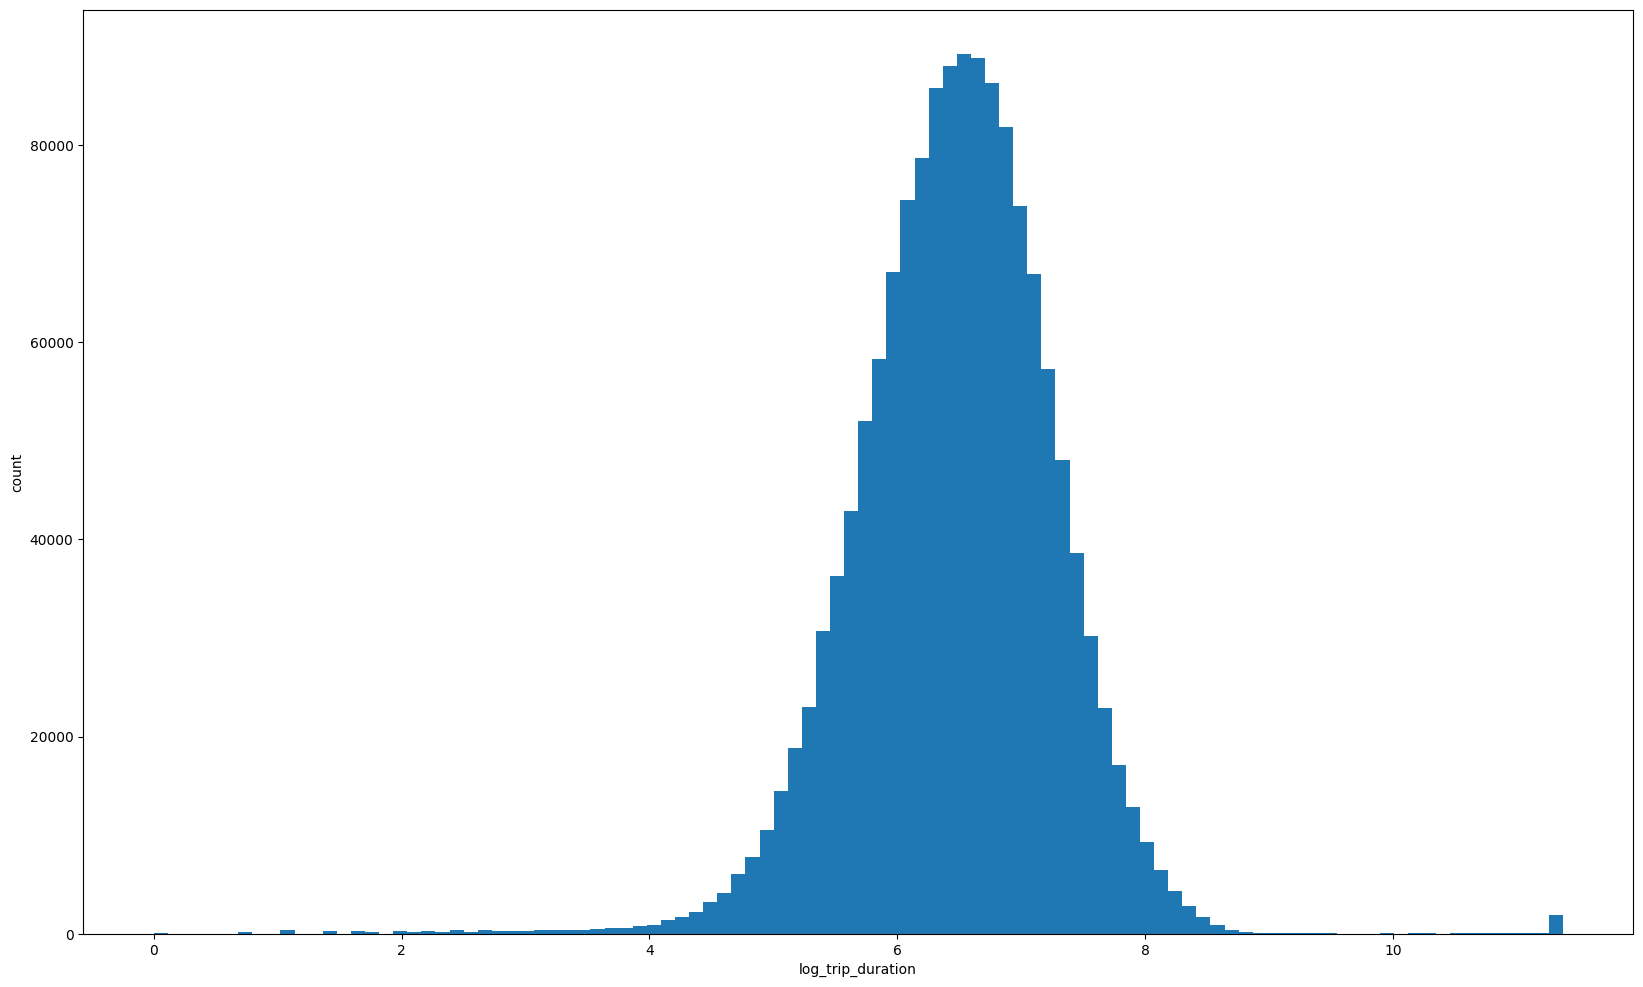

In [78]:
plt.figure(figsize=(20,12))
train['trip_duration'] = np.log(train['trip_duration'].values)
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()

In [81]:
train = train[(train.trip_duration < 9)]

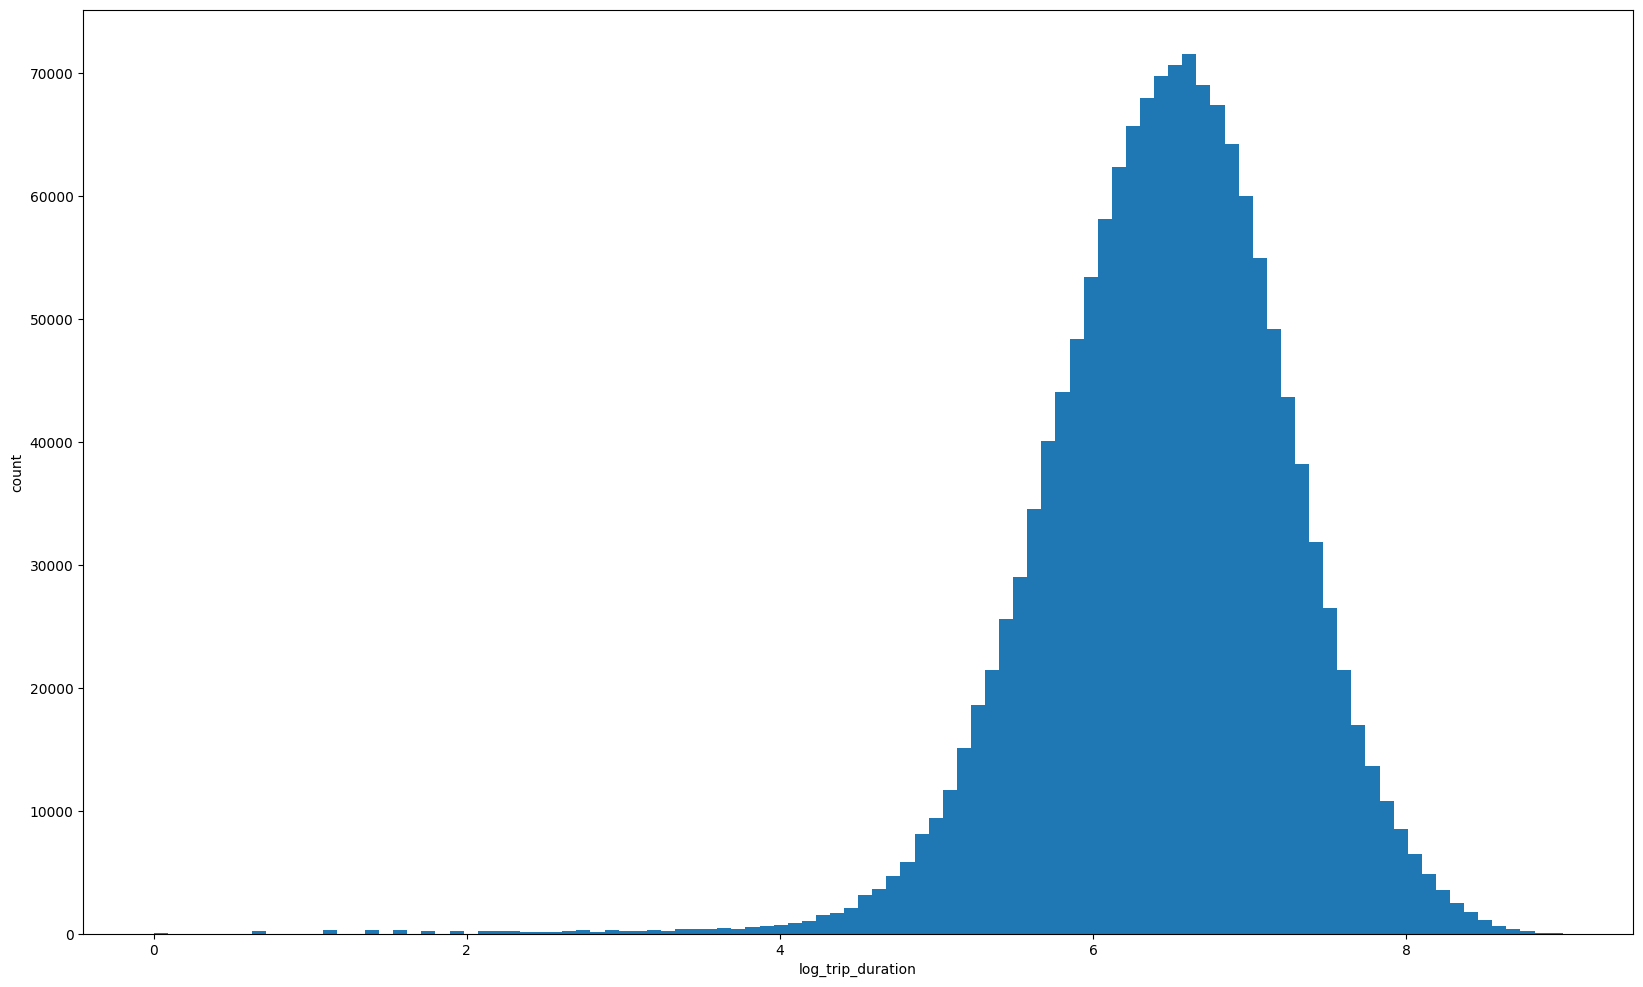

In [82]:
plt.figure(figsize=(20,12))
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel('log_trip_duration')
plt.ylabel('count')
plt.show()